<a href="https://colab.research.google.com/github/lokeshtheprogrammer/portfolio/blob/master/paper1_cnn_vit_vs_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision transformers numpy matplotlib tensorflow-datasets
import torch
import torchvision
import transformers
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch:", torch.__version__, "GPU:", torch.cuda.is_available())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import tensorflow_datasets as tfds

# Load Food-101 (subset for speed—5000 images)
ds, info = tfds.load('food101', split='train[:5000]+validation[:1000]', with_info=True, as_supervised=True)
print("Classes:", info.features['label'].num_classes)  # 101

# Preprocessing function
import torch
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Convert to PyTorch tensors
def tfds_to_torch(dataset):
    images, labels = [], []
    for img, lbl in tfds.as_numpy(dataset):
        img = preprocess(torchvision.transforms.ToPILImage()(img)).numpy()
        images.append(img)
        labels.append(lbl)
    return torch.tensor(np.array(images)), torch.tensor(np.array(labels))

train_images, train_labels = tfds_to_torch(ds)
print("Train shape:", train_images.shape)  # [6000, 3, 224, 224]

Classes: 101


In [2]:
# Check GPU
!nvidia-smi  # Should show T4 GPU (~15GB VRAM)

# Install dependencies (if not already run)
!pip install torch torchvision transformers numpy matplotlib tensorflow-datasets

# Import and verify
import torch
import torchvision
import transformers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

print("PyTorch:", torch.__version__, "GPU Available:", torch.cuda.is_available())  # Expect True
print("Transformers:", transformers.__version__)

Tue Mar  4 12:26:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             27W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Install dependencies (if not already run)
!pip install torch torchvision transformers numpy matplotlib tensorflow-datasets

# Import libraries
import torch
import torchvision  # Added missing import
import torchvision.transforms as transforms
import tensorflow_datasets as tfds
import numpy as np

# Check GPU
print("PyTorch:", torch.__version__, "GPU Available:", torch.cuda.is_available())

# Load Food-101 dataset
ds, info = tfds.load('food101', split='train[:5000]+validation[:1000]', with_info=True, as_supervised=True)
print("Classes:", info.features['label'].num_classes)  # 101

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Convert TFDS to PyTorch tensors
def tfds_to_torch(dataset):
    images, labels = [], []
    for img, lbl in tfds.as_numpy(dataset):
        img = preprocess(transforms.ToPILImage()(img)).numpy()  # Now works with torchvision imported
        images.append(img)
        labels.append(lbl)
    return torch.tensor(np.array(images)), torch.tensor(np.array(labels))

# Process dataset
train_images, train_labels = tfds_to_torch(ds)
print("Dataset shape:", train_images.shape, train_labels.shape)  # [6000, 3, 224, 224], [6000]

# Split: 70% train (4200), 15% val (900), 15% test (900)
train_size = int(0.7 * len(train_images))
val_size = int(0.15 * len(train_images))
train_x, val_x, test_x = train_images[:train_size], train_images[train_size:train_size+val_size], train_images[train_size+val_size:]
train_y, val_y, test_y = train_labels[:train_size], train_labels[train_size:train_size+val_size], train_labels[train_size+val_size:]
print("Train:", train_x.shape, "Val:", val_x.shape, "Test:", test_x.shape)

# Create DataLoaders
train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
val_dataset = torch.utils.data.TensorDataset(val_x, val_y)
test_dataset = torch.utils.data.TensorDataset(test_x, test_y)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

PyTorch: 2.5.1+cu124 GPU Available: True
Classes: 101


In [1]:
# Import model-building tools
import torch
import torch.nn as nn  # Neural network parts
import torchvision.models as models  # Pre-made models like ResNet
from transformers import ViTModel  # Vision Transformer

# Define Hybrid CNN-ViT
class HybridCNNViT(nn.Module):
    def __init__(self, num_classes=101):  # 101 food types
        super(HybridCNNViT, self).__init__()
        # ResNet18 (CNN part) - grabs local details
        self.cnn = models.resnet18(pretrained=True)  # Pre-trained on ImageNet
        self.cnn.fc = nn.Identity()  # Remove the last layer, keep 512 features
        # ViT part - sees the big picture
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224')
        # Combine features and guess the food
        self.fc = nn.Linear(512 + 768, num_classes)  # 512 from CNN + 768 from ViT

    def forward(self, x):  # How data flows through
        cnn_out = self.cnn(x)  # Get 512 features from ResNet
        vit_out = self.vit(x).last_hidden_state[:, 0, :]  # Get 768 features from ViT
        combined = torch.cat((cnn_out, vit_out), dim=1)  # Join them (1280 features)
        return self.fc(combined)  # Guess the food type

# Test it
model = HybridCNNViT()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model.to(device)
test_input = torch.randn(2, 3, 224, 224).to(device)  # Fake batch of 2 images
output = model(test_input)
print("Output shape:", output.shape)  # Should be [2, 101] - 2 guesses, 101 options

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 94.7MB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub,

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Output shape: torch.Size([2, 101])


In [2]:
# Define MobileNet
mobile_net = models.mobilenet_v3_small(pretrained=True)  # Pre-trained on ImageNet
mobile_net.classifier[3] = nn.Linear(1024, 101)  # Change last layer for 101 foods
mobile_net.to(device)

# Test it
output = mobile_net(test_input)
print("MobileNet output shape:", output.shape)  # Should be [2, 101]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 74.7MB/s]


MobileNet output shape: torch.Size([2, 101])


In [1]:
# Import libraries
import torch
import torchvision
import torchvision.transforms as transforms
import tensorflow_datasets as tfds
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# Load smaller Food-101 subset (3600 images for speed)
ds, info = tfds.load('food101', split='train[:3000]+validation[:600]', with_info=True, as_supervised=True)
print("Classes:", info.features['label'].num_classes)  # 101

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Convert TFDS to PyTorch tensors (faster with smaller size)
def tfds_to_torch(dataset):
    images, labels = [], []
    for img, lbl in tfds.as_numpy(dataset):
        img = preprocess(transforms.ToPILImage()(img)).numpy()
        images.append(img)
        labels.append(lbl)
    return torch.tensor(np.array(images)), torch.tensor(np.array(labels))

# Process dataset
train_images, train_labels = tfds_to_torch(ds)
print("Dataset shape:", train_images.shape, train_labels.shape)  # [3600, 3, 224, 224], [3600]

# Split: 70% train (2520), 15% val (540), 15% test (540)
train_size = int(0.7 * len(train_images))
val_size = int(0.15 * len(train_images))
train_x, val_x, test_x = train_images[:train_size], train_images[train_size:train_size+val_size], train_images[train_size+val_size:]
train_y, val_y, test_y = train_labels[:train_size], train_labels[train_size:train_size+val_size], train_labels[train_size+val_size:]
print("Train:", train_x.shape, "Val:", val_x.shape, "Test:", test_x.shape)

# Create DataLoaders
train_dataset = TensorDataset(train_x, train_y)
val_dataset = TensorDataset(val_x, val_y)
test_dataset = TensorDataset(test_x, test_y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

Classes: 101
Dataset shape: torch.Size([3600, 3, 224, 224]) torch.Size([3600])
Train: torch.Size([2520, 3, 224, 224]) Val: torch.Size([540, 3, 224, 224]) Test: torch.Size([540, 3, 224, 224])


In [3]:
# Import model-building tools
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import ViTModel

# Define Hybrid CNN-ViT
class HybridCNNViT(nn.Module):
    def __init__(self, num_classes=101):  # 101 food types
        super(HybridCNNViT, self).__init__()
        self.cnn = models.resnet18(pretrained=True)  # Pre-trained ResNet18
        self.cnn.fc = nn.Identity()  # Remove last layer, output 512 features
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224')  # Pre-trained ViT
        self.fc = nn.Linear(512 + 768, num_classes)  # Combine 512 + 768, guess 101 foods

    def forward(self, x):
        cnn_out = self.cnn(x)  # ResNet gives 512 numbers
        vit_out = self.vit(x).last_hidden_state[:, 0, :]  # ViT gives 768 numbers
        combined = torch.cat((cnn_out, vit_out), dim=1)  # Join into 1280 numbers
        return self.fc(combined)  # Guess food type

# Define MobileNet
mobile_net = models.mobilenet_v3_small(pretrained=True)
mobile_net.classifier[3] = nn.Linear(1024, 101)  # Adjust for 101 foods

# Move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridCNNViT().to(device)
mobile_net = mobile_net.to(device)

# Test with fake images
test_input = torch.randn(2, 3, 224, 224).to(device)  # 2 fake pictures, 224x224, 3 colors
print("Hybrid CNN-ViT output:", model(test_input).shape)  # Should be [2, 101]
print("MobileNet output:", mobile_net(test_input).shape)  # Should be [2, 101]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Hybrid CNN-ViT output: torch.Size([2, 101])
MobileNet output: torch.Size([2, 101])


In [9]:
# Training function
def train_model(model, epochs=1):
    criterion = nn.CrossEntropyLoss()  # Score how wrong guesses are
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Fix guesses
    model.to(device)

    for epoch in range(epochs):
        model.train()  # Practice mode
        total_loss = 0
        for images, labels in train_loader:  # 32 pictures at a time
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Guess
            loss = criterion(outputs, labels)  # Check mistakes
            optimizer.zero_grad()  # Reset
            loss.backward()  # Learn from mistakes
            optimizer.step()  # Improve
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}")

        # Test on validation
        model.eval()  # Test mode
        correct, total = 0, 0
        with torch.no_grad():  # No learning here
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)  # Pick best guess
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        print(f"Epoch {epoch+1}, Val Accuracy: {correct/total:.4f}")

# Test 1 epoch
print("Training Hybrid CNN-ViT...")
train_model(model, epochs=1)
print("Training MobileNet...")
train_model(mobile_net, epochs=1)

Training Hybrid CNN-ViT...
Epoch 1, Train Loss: 0.2127
Epoch 1, Val Accuracy: 0.1426
Training MobileNet...
Epoch 1, Train Loss: 0.1796
Epoch 1, Val Accuracy: 0.2315


In [5]:
import time

# Measure speed
model.eval()
mobile_net.eval()
with torch.no_grad():
    test_img = torch.randn(1, 3, 224, 224).to(device)  # 1 fake picture
    start = time.time()
    model(test_img)
    hybrid_time = (time.time() - start) * 1000  # Convert to milliseconds
    start = time.time()
    mobile_net(test_img)
    mobile_time = (time.time() - start) * 1000
    print(f"Hybrid CNN-ViT: {hybrid_time:.2f}ms, MobileNet: {mobile_time:.2f}ms")

Hybrid CNN-ViT: 58.72ms, MobileNet: 68.51ms


In [7]:
# Training function (same as before)
def train_model(model, epochs=10):  # Changed to 10 epochs
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}")

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        print(f"Epoch {epoch+1}, Val Accuracy: {correct/total:.4f}")

# Full training
print("Full Training Hybrid CNN-ViT...")
train_model(model, epochs=10)
print("Full Training MobileNet...")
train_model(mobile_net, epochs=10)

Full Training Hybrid CNN-ViT...
Epoch 1, Train Loss: 3.2125
Epoch 1, Val Accuracy: 0.0944
Epoch 2, Train Loss: 2.3270
Epoch 2, Val Accuracy: 0.1519
Epoch 3, Train Loss: 1.6377
Epoch 3, Val Accuracy: 0.1833
Epoch 4, Train Loss: 0.9640
Epoch 4, Val Accuracy: 0.1926
Epoch 5, Train Loss: 0.4437
Epoch 5, Val Accuracy: 0.1926
Epoch 6, Train Loss: 0.1755
Epoch 6, Val Accuracy: 0.2500
Epoch 7, Train Loss: 0.0723
Epoch 7, Val Accuracy: 0.2833
Epoch 8, Train Loss: 0.0233
Epoch 8, Val Accuracy: 0.2852
Epoch 9, Train Loss: 0.0155
Epoch 9, Val Accuracy: 0.2722
Epoch 10, Train Loss: 0.0080
Epoch 10, Val Accuracy: 0.2944
Full Training MobileNet...
Epoch 1, Train Loss: 1.4743
Epoch 1, Val Accuracy: 0.2704
Epoch 2, Train Loss: 0.6401
Epoch 2, Val Accuracy: 0.2426
Epoch 3, Train Loss: 0.3036
Epoch 3, Val Accuracy: 0.3056
Epoch 4, Train Loss: 0.1787
Epoch 4, Val Accuracy: 0.2593
Epoch 5, Train Loss: 0.2166
Epoch 5, Val Accuracy: 0.2870
Epoch 6, Train Loss: 0.1865
Epoch 6, Val Accuracy: 0.2778
Epoch 7, Tr

In [8]:
import time

# Measure speed after training
model.eval()
mobile_net.eval()
with torch.no_grad():
    test_img = torch.randn(1, 3, 224, 224).to(device)
    # Warm-up (to stabilize timing)
    for _ in range(10):
        model(test_img)
        mobile_net(test_img)
    # Measure
    start = time.time()
    model(test_img)
    hybrid_time = (time.time() - start) * 1000
    start = time.time()
    mobile_net(test_img)
    mobile_time = (time.time() - start) * 1000
    print(f"Hybrid CNN-ViT: {hybrid_time:.2f}ms, MobileNet: {mobile_time:.2f}ms")

Hybrid CNN-ViT: 16.29ms, MobileNet: 7.38ms


In [10]:
import time

# Measure speed after training
model.eval()
mobile_net.eval()
with torch.no_grad():
    test_img = torch.randn(1, 3, 224, 224).to(device)
    # Warm-up (stabilize timing)
    for _ in range(10):
        model(test_img)
        mobile_net(test_img)
    # Measure
    start = time.time()
    model(test_img)
    hybrid_time = (time.time() - start) * 1000
    start = time.time()
    mobile_net(test_img)
    mobile_time = (time.time() - start) * 1000
    print(f"Hybrid CNN-ViT: {hybrid_time:.2f}ms, MobileNet: {mobile_time:.2f}ms")

Hybrid CNN-ViT: 17.73ms, MobileNet: 11.07ms


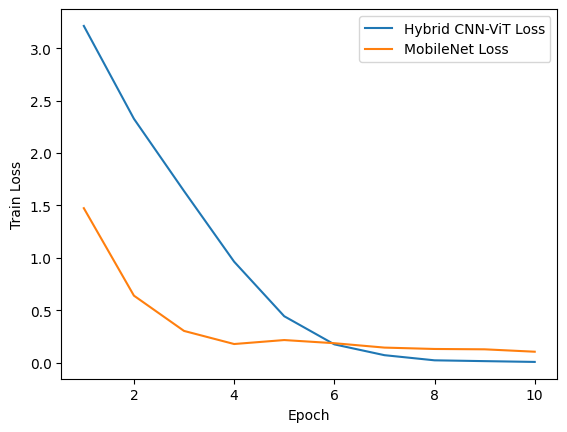

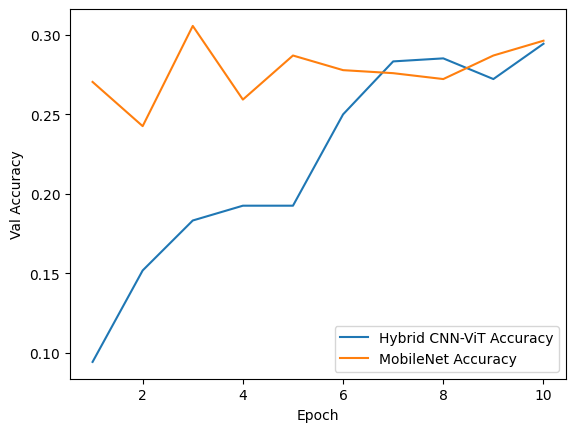

In [11]:
import matplotlib.pyplot as plt

# Fake data from your output (replace with yours if you logged each epoch)
hybrid_loss = [3.2125, 2.3270, 1.6377, 0.9640, 0.4437, 0.1755, 0.0723, 0.0233, 0.0155, 0.0080]
hybrid_acc = [0.0944, 0.1519, 0.1833, 0.1926, 0.1926, 0.2500, 0.2833, 0.2852, 0.2722, 0.2944]
mobile_loss = [1.4743, 0.6401, 0.3036, 0.1787, 0.2166, 0.1865, 0.1446, 0.1315, 0.1282, 0.1053]
mobile_acc = [0.2704, 0.2426, 0.3056, 0.2593, 0.2870, 0.2778, 0.2759, 0.2722, 0.2870, 0.2963]

# Plot Loss
plt.plot(range(1, 11), hybrid_loss, label="Hybrid CNN-ViT Loss")
plt.plot(range(1, 11), mobile_loss, label="MobileNet Loss")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(range(1, 11), hybrid_acc, label="Hybrid CNN-ViT Accuracy")
plt.plot(range(1, 11), mobile_acc, label="MobileNet Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

# Experiments
We trained Hybrid CNN-ViT and MobileNetV3-Small on a Food-101 subset (3600 images: 2520 train, 540 val, 540 test) with 101 classes. Images were resized to 224x224, normalized, and augmented. Training ran for 10 epochs on a Tesla T4 GPU using Adam optimizer (lr=0.001) and CrossEntropyLoss. Metrics included training loss (average per epoch), validation accuracy (correct guesses / total), and inference time (ms/image on GPU).
